In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import project_baseball as project

In [2]:
df = pd.read_csv('data/big_daddy_baseball_cleaned.csv')
mlb20 = pd.read_csv('data/2020cleaned.csv')
mlb19 = pd.read_csv('data/2019cleaned.csv')
mlb18 = pd.read_csv('data/2018cleaned.csv')
mlb17 = pd.read_csv('data/2017cleaned.csv')
mlb16 = pd.read_csv('data/2016cleaned.csv')

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [5]:
mlb20[mlb20['release_pos_x'].notnull()].head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
0,2020-10-27,FF,Julio Urias,628711,Willy Adames,642715,96.7,1.58,5.99,1,0,0,2,0.2,1.6,-0.53,2.29,0,0,0,9,1,95.4,2615.0,5.7,605131,571970,571771,621458,608369,621035,641355,605141,65,3,4-Seam Fastball,1,3,1,3,Standard,Standard,0-2,strike,strikeout,called_strike,S,NaN,-5.950264,-140.490456,-7.897391,3.772000,32.321911,-8.981441,2
1,2020-10-27,FF,Julio Urias,628711,Willy Adames,642715,94.1,2.91,5.45,1,0,0,1,0.8,1.3,-0.55,3.03,0,0,0,9,1,93.4,2470.0,5.9,605131,571970,571771,621458,608369,621035,641355,605141,65,2,4-Seam Fastball,1,3,1,3,Standard,Standard,0-1,strike,NaN,called_strike,S,NaN,-10.560246,-136.599519,-3.429867,11.723598,29.183810,-15.237217,2
2,2020-10-27,FF,Julio Urias,628711,Willy Adames,642715,94.9,1.77,6.02,1,0,0,0,0.2,1.5,-0.04,3.32,0,0,0,9,1,94.0,2397.0,5.7,605131,571970,571771,621458,608369,621035,641355,605141,65,1,4-Seam Fastball,1,3,1,3,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,-5.199252,-138.098234,-4.637970,4.158758,30.838499,-12.535677,2
3,2020-10-27,FF,Julio Urias,628711,Mike Brosseau,670712,94.4,1.66,5.93,1,0,3,2,0.3,1.5,-0.37,2.15,0,0,0,9,1,93.7,2508.0,5.9,605131,571970,571771,621458,608369,621035,641355,605141,64,6,4-Seam Fastball,1,3,1,3,Standard,Standard,3-2,strike,strikeout,called_strike,S,NaN,-5.843595,-137.294295,-7.414897,4.754147,30.016237,-11.778755,1
4,2020-10-27,CU,Julio Urias,628711,Mike Brosseau,670712,81.4,1.46,6.06,1,0,2,2,-1.7,-0.2,-0.14,0.96,0,0,0,9,1,80.2,3031.0,5.7,605131,571970,571771,621458,608369,621035,641355,605141,64,5,Curveball,1,3,1,3,Standard,Standard,2-2,ball,NaN,ball,B,NaN,-0.383207,-118.447810,-4.454166,-15.553576,24.451936,-32.892744,1


In [6]:
le = LabelEncoder()
target = le.fit(mlb20['strike_attempt'])

In [7]:
mlb20['target']=target.transform(mlb20['strike_attempt'])

In [14]:
mlb20['target']

0         3
1         3
2         3
3         3
4         0
         ..
279655    2
279656    3
279657    3
279658    0
279659    0
Name: target, Length: 279660, dtype: int32

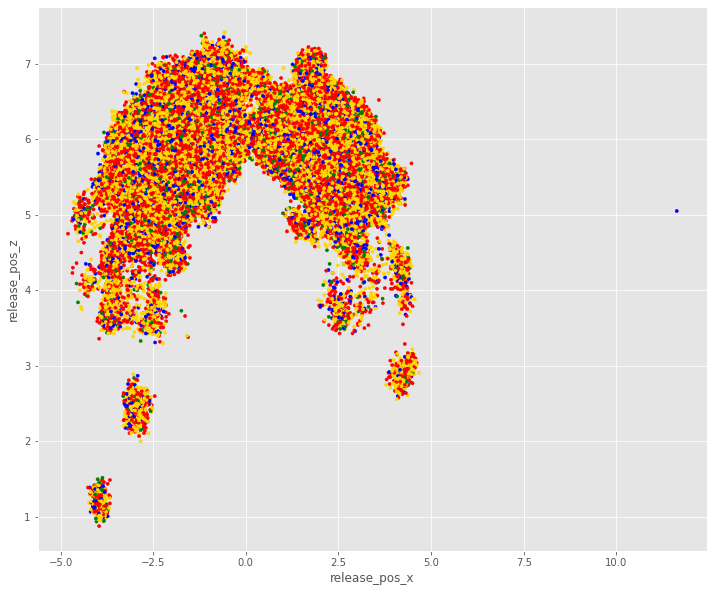

In [8]:
colors = ["red", "green", "blue","gold"]
mlb20['color'] = mlb20['target'].map(lambda p: colors[p])

ax1 = mlb20.plot(kind="scatter", x="release_pos_x", y="release_pos_z", 
                                                   figsize=(12,10), s=10, c=mlb20['color'])

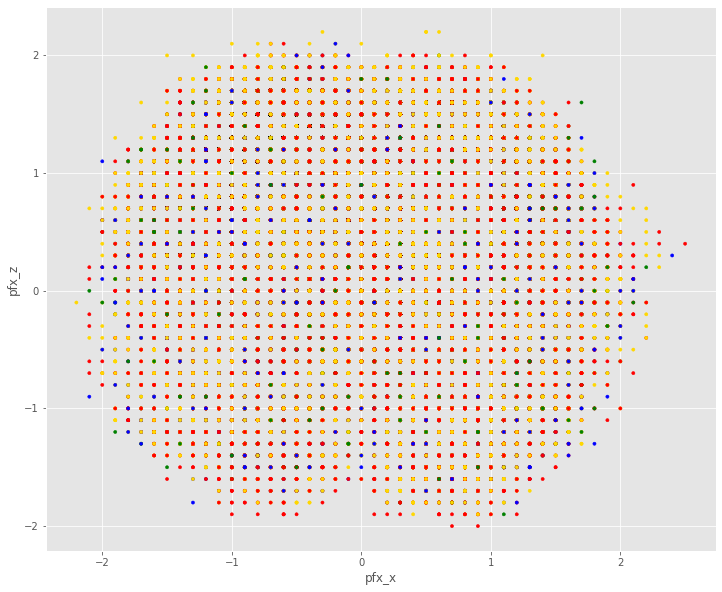

In [9]:
ax2 = mlb20.plot(kind='scatter', x='pfx_x', y='pfx_z', figsize=(12,10), s=10,c=mlb20['color'])

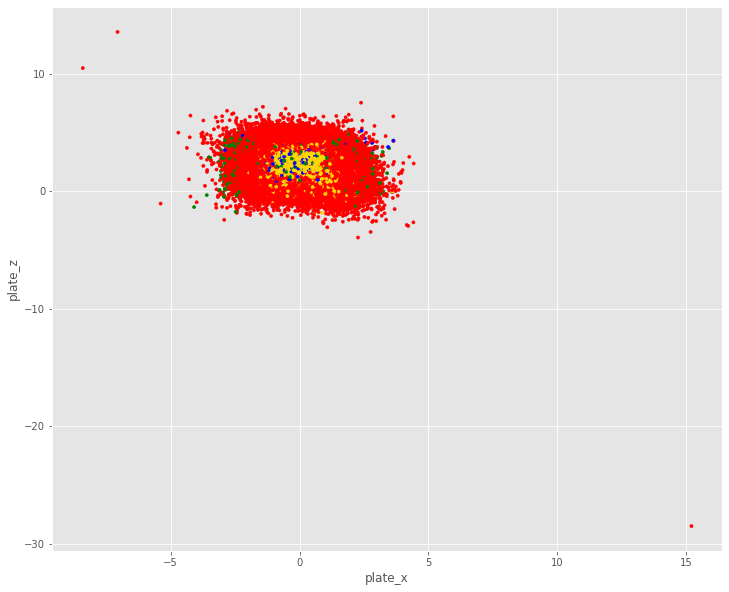

In [10]:
ax3 = mlb20.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(12,10), s=10, c=mlb20['color'])

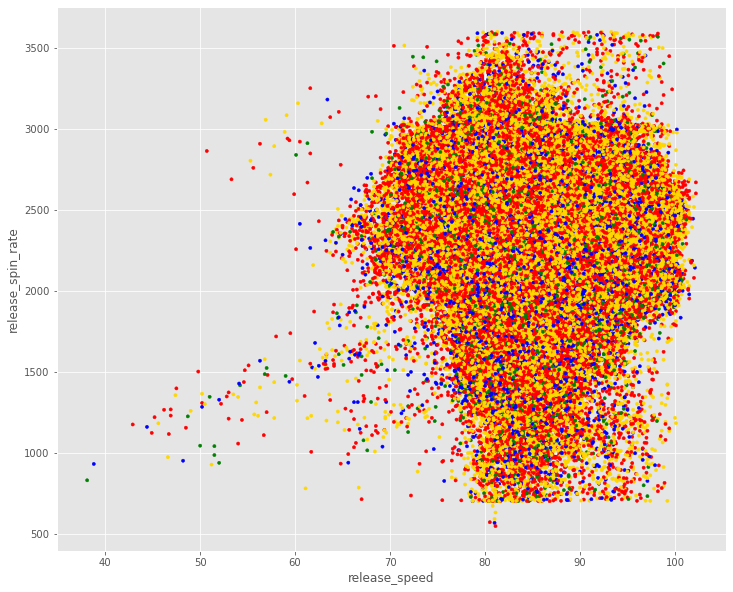

In [11]:
ax4 = mlb20.plot(kind='scatter', x='release_speed', y='release_spin_rate', figsize=(12,10), s=10,c=mlb20['color'])

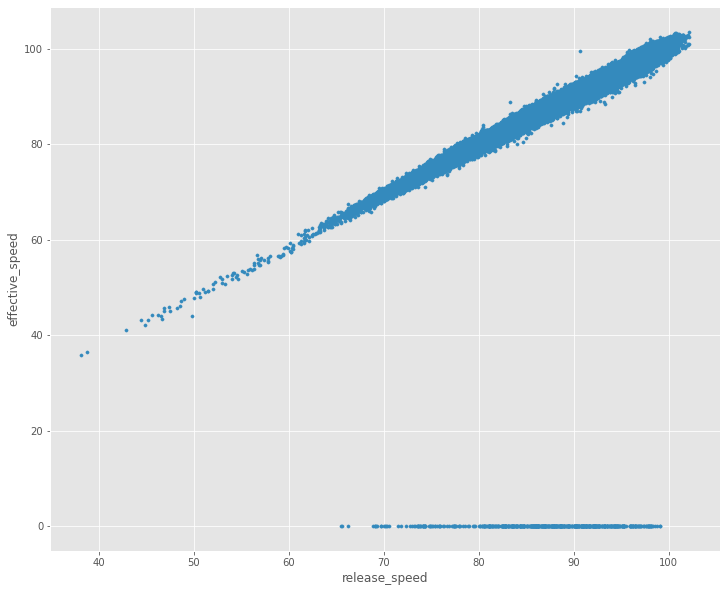

In [12]:
ax5 = mlb20[mlb20['release_speed'].notnull()].plot(kind='scatter', x='release_speed', y='effective_speed', figsize=(12,10), s=10)